In [4]:
import shapes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

let's load in some data

now create a box around that data by fitting a line to the data 

In [5]:
b=shapes.Box()
b.data=sns.load_dataset('iris')
b.linestyle

/Users/caganze/Research/shapes/shapes/shapes.py:208: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x=input.ix[:,0].astype(float).as_matrix()
/Users/caganze/Research/shapes/shapes/shapes.py:209: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y=input.ix[:,1].astype(float).as_matrix()


'--'

In [6]:
print ('vertices: {} '.format(np.round(b.vertices, 1)))
print ('length : {}'.format(len(b)))
print ('angle : {}'.format(b.angle))
print ('completeness: {}'.format(b.efficiency))
print ('scatter: {}'.format(b.scatter))
print ('coefficients: {}'.format(b.coeffs))

vertices: [[4.3 3.8]
 [7.9 3.6]
 [7.9 2.3]
 [4.3 2.5]
 [4.3 3.8]] 
length : 150
angle : 0.06180597834728915
completeness: 0.84
scatter: 0.647097245984775
coefficients: [-0.0618848   3.41894684]


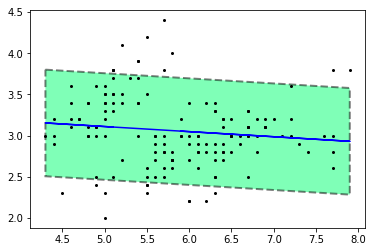

In [10]:
fig, ax=plt.subplots()
b.alpha=0.5
b.color="#01FF70"
b.plot(ax=ax, only_shape=False, size=4)
line=np.poly1d(b.coeffs)
plt.plot(b.data[0], line(b.data[0]), 'b')

selection

(2, 126) (126, 2)


/Users/caganze/Research/shapes/shapes/shapes.py:91: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  bools=self._select(np.array([data['x'].as_matrix(), data['y'].as_matrix()]))[1]


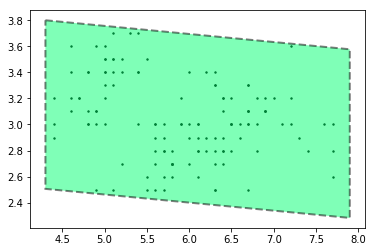

In [11]:
#with an array
s1=b.select(b.data)
#with a pandas datafrane
d=pd.DataFrame(b.data).transpose()
s2=b.select(d)
print (s1.shape, s2.shape)
fig, ax=plt.subplots()
b.plot(ax=ax)
ax.scatter(s1[0], s1[1], c='k', s=2)

Checking points in the box

In [12]:
b.contains([(0, 3), (0.5, 1)])

[False, False]

Rotations

In [13]:
import copy
b2=copy.deepcopy(b)
b2.rotate(np.pi/2)
b2.color="#B10DC9"
b3=copy.deepcopy(b)
b3.color='#FF4136'
b3.rotate(np.pi/2-b.angle)

angles 0.06180597834728915 1.5089903484476068
reminder : axes scales are not the same


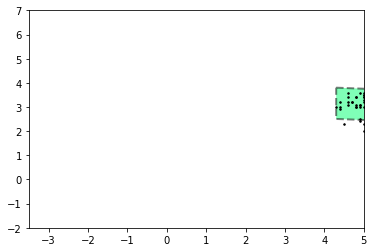

In [14]:
fig, ax=plt.subplots()
ax.set_xlim([-3.5, 5.0])
ax.set_ylim(-2, 7.0)
b2.plot()
b.plot(only_shape=False, size=3)
b3.plot()
print ('angles {} {}'.format(b.angle, b2.angle))
print ('reminder : axes scales are not the same')